# MinorProject-3
## Implementing KMeans

### Importing Necessary Libraries

In [38]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

### Import DataSet

In [39]:
df = pd.read_csv('income.csv', delimiter=',')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [40]:
df.shape

(22, 3)

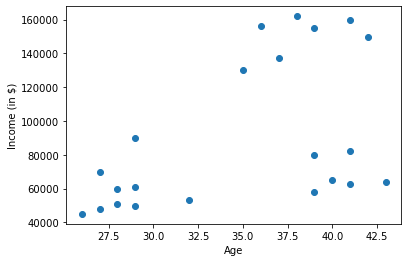

In [41]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income (in $)')
plt.show()

### Building KMeans Model
**Without DataPreprocessing**

In [42]:
kms = KMeans(n_clusters= 3)
y_pred = kms.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [43]:
df['Cluster'] =y_pred
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [44]:
kms.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [45]:
df_1 = df[df.Cluster == 0]
df_2 = df[df.Cluster == 1]
df_3 = df[df.Cluster == 2]

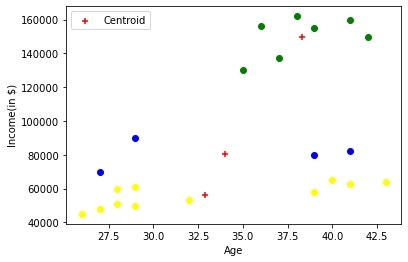

In [46]:
plt.scatter(df_1.Age, df_1['Income($)'], color = 'blue')
plt.scatter(df_2.Age, df_2['Income($)'], color = 'green')
plt.scatter(df_3.Age, df_3['Income($)'], color = 'yellow')
plt.scatter(kms.cluster_centers_[:,0], kms.cluster_centers_[:,1], color = 'red', marker = '+', label = 'Centroid')
plt.xlabel('Age')
plt.ylabel('Income(in $)')
plt.legend()
plt.show()

### Data Preprocessig using MinMax Scaler

In [49]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [50]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


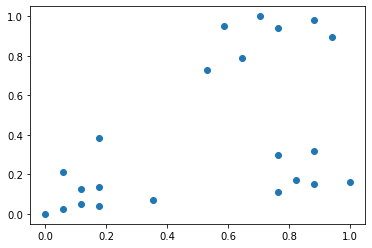

In [51]:
plt.scatter(df.Age, df['Income($)'])
plt.show()

### KMeans Clustering Model
**After Precprocessind Data**

In [52]:
kms = KMeans(n_clusters= 3)
y_pred = kms.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [53]:
df['Cluster'] =y_pred
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [54]:
kms.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [55]:
df_1 = df[df.Cluster == 0]
df_2 = df[df.Cluster == 1]
df_3 = df[df.Cluster == 2]

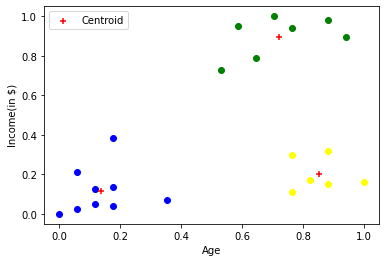

In [56]:
plt.scatter(df_1.Age, df_1['Income($)'], color = 'blue')
plt.scatter(df_2.Age, df_2['Income($)'], color = 'green')
plt.scatter(df_3.Age, df_3['Income($)'], color = 'yellow')
plt.scatter(kms.cluster_centers_[:,0], kms.cluster_centers_[:,1], color = 'red', marker = '+', label = 'Centroid')
plt.xlabel('Age')
plt.ylabel('Income(in $)')
plt.legend()
plt.show()

### Finding Best Number of Clusters using **Elbow Curve Graph**

In [58]:
s = []

k_cent = range(1,11)
for k in k_cent:
    km = KMeans(n_clusters= k)
    km.fit(df[['Age', 'Income($)']])
    s.append(km.inertia_)

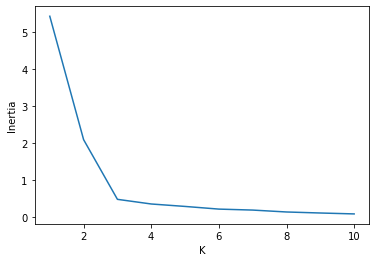

In [60]:
plt.xlabel('K')
plt.ylabel('Inertia')
plt.plot(k_cent, s)
plt.show()